### Function and Prob. Dist. Vis Playground

This notebook is used to visualize various functions and probability distributions while building the simulation.

So non of the content here is a result of the simulation, but rather a preparation for it.

In [97]:
from typing import Callable, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import root

In [98]:
def exponential_decay(lam: float) -> Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]]:
    p = lambda x: np.exp(-x * lam)
    return p

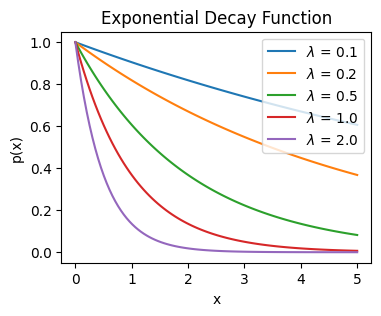

In [99]:
# Visualize the exponential decay function

lams = [0.1, 0.2, 0.5, 1.0, 2.0]
x = np.linspace(0, 5, 100)
plt.figure(figsize=(4, 3))
for lam in lams:
    p = exponential_decay(lam)
    plt.plot(x, p(x), label=f'$\lambda$ = {lam}')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Exponential Decay Function')
plt.legend()
plt.show()

In [100]:
# For friendship establishment we want the nodes to be extremely close to each other, this means we need to increase the lambda paramater of the exponential decay function
# In our case all positions are normalized to be between 0 and 1, so we need to figure out a suitable lambda value min distance 0 and max distance sqrt(2).
# Let's deside the lambda parameter by setting a distance such that at exactly that distance the probability of friendship establishment is 0.5.

def friendship_establishment_probability(equ_prob_dist: float) -> Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]]:
    """ Returns a function that calculates the probability of friendship establishment based on the distance between two nodes.
    
    Args:
        equ_prob_dist: The distance at which the probability of friendship establishment is 0.5.

    Returns:
        A function that calculates the probability of friendship establishment based on the distance between two nodes.
    """

    lam = - np.log(0.5) / equ_prob_dist
    p = exponential_decay(lam)

    return p


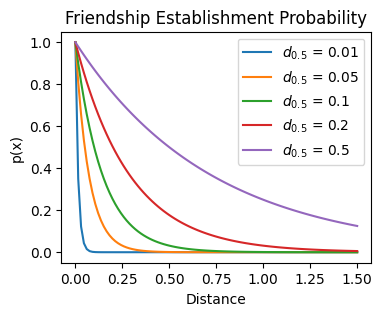

In [101]:
# Visualize the friendship establishment probability function

equ_prob_dists = [0.01, 0.05, 0.1, 0.2, 0.5]

x = np.linspace(0, 1.5, 100)
plt.figure(figsize=(4, 3))
for equ_prob_dist in equ_prob_dists:
    p = friendship_establishment_probability(equ_prob_dist)
    plt.plot(x, p(x), label=f'$d_{{0.5}}$ = {equ_prob_dist}')
plt.xlabel('Distance')
plt.ylabel('p(x)')
plt.title('Friendship Establishment Probability')
plt.legend()
plt.show()

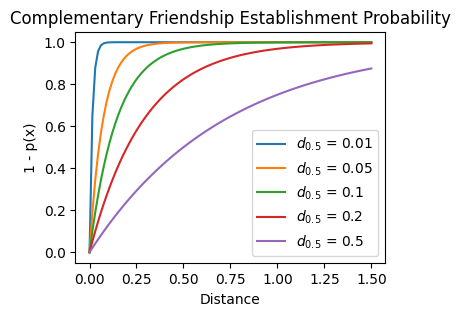

In [102]:
# For breaking a friendship we want the nodes to be extremely far from each other, this means we need a kind of symmetric function to the friendship establishment function.
# Yet we can't directly achieve that because theoretically friendship establishment function does not have a maximum value, but we wan't this function to be 1 at distance sqrt(2).
# Let's first check what does 1 - p(x) look like for the friendship establishment function.

plt.figure(figsize=(4, 3))
for equ_prob_dist in equ_prob_dists:
    p = friendship_establishment_probability(equ_prob_dist)
    plt.plot(x, 1 - p(x), label=f'$d_{{0.5}}$ = {equ_prob_dist}')
plt.xlabel('Distance')
plt.ylabel('1 - p(x)')
plt.title('Complementary Friendship Establishment Probability')
plt.legend()
plt.show()

# It seems like using 1 - p(x) is not a good idea because first of all we really would like an exponentialy function-like probability function for breaking a friendship. Let's try something new.

In [129]:
# Let us model the friendship breaking probability as: p(x) = min(c1 * exp(lam * x) + c2, 1), where c1, c2, and lam are parameters to be determined.
# To determine them we will use the following constraints:
# 1. p(0) = 0
# 2. p(sqrt(2)) = 1
# 3. p(equ_prob_dist) = 0.5

# So again we will have a function that will be determined by the equ_prob_dist parameter.

# When we solve for the given contraints we end up with the following equations:

# c1 > 0

maximum_distance = np.sqrt(2)

print("equ_prob_dist > maximum_distance / ln(2):", maximum_distance / np.log(2))

def friendship_breaking_probability(equ_prob_dist: float) -> Tuple[Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]], dict]:
    """ Returns a function that calculates the probability of friendship breaking based on the distance between two nodes.
    
    Args:
        equ_prob_dist: The distance at which the probability of friendship breaking is 0.5.

    Returns:
        A function that calculates the probability of friendship breaking based on the distance between two nodes.
    """

    # To be able to find c1 we need to solve:

    # K * ln((c1 + 1) / c1) = ln((c1 + 0.5) / c1)
    # where K = equ_prob_dist / maximum_distance
    # This does not have a straightforward solution due to transcendental nature of the equation.
    # So let's use Newton-Raphson method to find the solution.

    K = equ_prob_dist / maximum_distance
    f = lambda c1: K * np.log(1 + 1/c1) - np.log(1 + 1/(2*c1))

    c1 = float(root(f, 1.e-6, method="hybr").x[0])
    lam = (1 / maximum_distance) * np.log(1 + 1/c1)

    p = lambda x: np.minimum(c1 * (np.exp(lam * x) - 1), 1)

    return p, {"c1": c1, "lam": lam}


equ_prob_dist > maximum_distance / ln(2): 2.0402788931935794


C:\Users\Bugra\AppData\Local\Temp\ipykernel_9504\118215103.py:35: RuntimeWarning: invalid value encountered in log
  f = lambda c1: K * np.log(1 + 1/c1) - np.log(1 + 1/(2*c1))


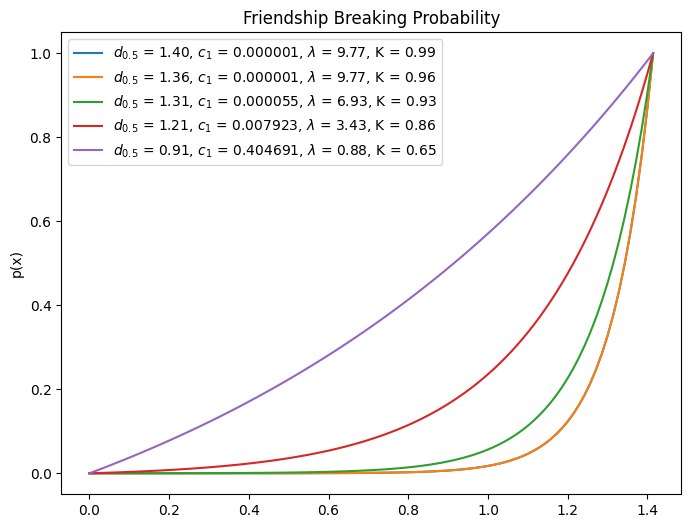

In [131]:
# Visualize the friendship breaking probability function

equ_prob_dists_from_max = [0.01, 0.05, 0.1, 0.2, 0.5]
equ_prob_dists = [maximum_distance - equ_prob_dist for equ_prob_dist in equ_prob_dists_from_max]

x = np.linspace(0, maximum_distance, 100)
plt.figure(figsize=(8, 6))
for equ_prob_dist in equ_prob_dists:
    p, params = friendship_breaking_probability(equ_prob_dist)
    c1 = params["c1"]
    lam = params["lam"]
    K = equ_prob_dist / maximum_distance
    plt.plot(x, p(x), label=f'$d_{{0.5}}$ = {equ_prob_dist:.2f}, $c_1$ = {c1:.6f}, $\lambda$ = {lam:.2f}, K = {K:.2f}')
plt.ylabel('p(x)')
plt.title('Friendship Breaking Probability')
plt.legend()
plt.show()

In [135]:
equ_prob_dist = 0.01
p_e = friendship_establishment_probability(equ_prob_dist)
p_b, params = friendship_breaking_probability(maximum_distance - equ_prob_dist)

C:\Users\Bugra\AppData\Local\Temp\ipykernel_9504\118215103.py:35: RuntimeWarning: invalid value encountered in log
  f = lambda c1: K * np.log(1 + 1/c1) - np.log(1 + 1/(2*c1))


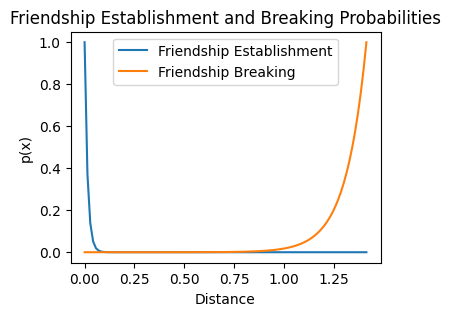

In [137]:
x = np.linspace(0, maximum_distance, 100)
plt.figure(figsize=(4, 3))
plt.plot(x, p_e(x), label='Friendship Establishment')
plt.plot(x, p_b(x), label='Friendship Breaking')
plt.xlabel('Distance')
plt.ylabel('p(x)')
plt.title('Friendship Establishment and Breaking Probabilities')
plt.legend()
plt.show()

In [142]:
# Since when we have the distributions like this they are not symmetric, we can also try to model the symmetric of the friendship establishment function to get the friendship breaking function.
# But the current version is also good enough for our purposes, only breaking a friendship is a bit easier than establishing one.

def friendship_breaking_probability_alternative(equ_prob_dist: float) -> Tuple[Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]], dict]:
    """ Returns a function that calculates the probability of friendship breaking based on the distance between two nodes.
    
    Args:
        equ_prob_dist: The distance at which the probability of friendship breaking is 0.5.

    Returns:
        A function that calculates the probability of friendship breaking based on the distance between two nodes.
    """

    symmetric_equ_prob_dist = maximum_distance - equ_prob_dist
    p = friendship_establishment_probability(symmetric_equ_prob_dist)
    sym_p = lambda x: p(np.maximum(0, maximum_distance - x))

    return sym_p, {}

C:\Users\Bugra\AppData\Local\Temp\ipykernel_9504\118215103.py:35: RuntimeWarning: invalid value encountered in log
  f = lambda c1: K * np.log(1 + 1/c1) - np.log(1 + 1/(2*c1))


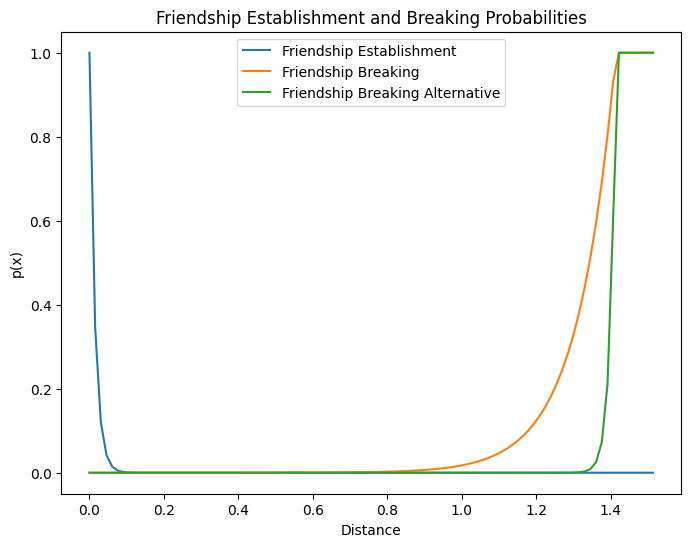

In [143]:

# Visualize all 3 functions

x = np.linspace(0, maximum_distance + 0.1, 100)
plt.figure(figsize=(8, 6))

p_e = friendship_establishment_probability(equ_prob_dist)
plt.plot(x, p_e(x), label='Friendship Establishment')

p_b, params = friendship_breaking_probability(maximum_distance - equ_prob_dist)
plt.plot(x, p_b(x), label='Friendship Breaking')

p_b_alt, _ = friendship_breaking_probability_alternative(maximum_distance - equ_prob_dist)
plt.plot(x, p_b_alt(x), label='Friendship Breaking Alternative')

plt.xlabel('Distance')
plt.ylabel('p(x)')
plt.title('Friendship Establishment and Breaking Probabilities')
plt.legend()
plt.show()